In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
df=pd.read_csv("/content/gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [58]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [59]:
df.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


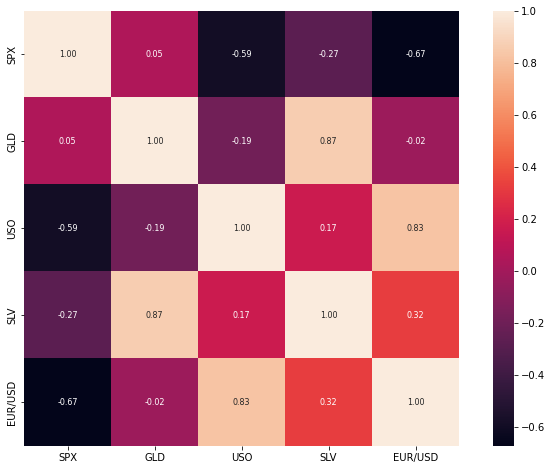

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cbar='True',square = 'True',annot = True ,annot_kws={'size':8},fmt='.2F')

In [61]:
df.shape

(2290, 6)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


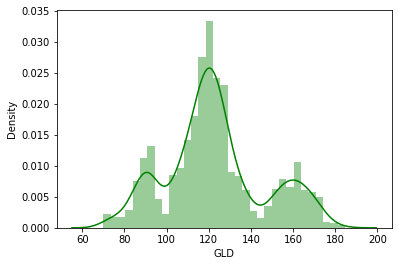

In [62]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


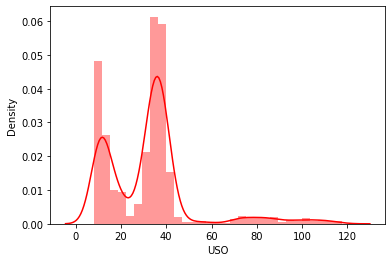

In [63]:
sns.distplot(df['USO'],color='red')

In [64]:
data_copy=df.copy()
data_copy.Date=pd.to_datetime(data_copy["Date"])
data_copy.set_index("Date")

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692
2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491
2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492
2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299
2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789
2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722
2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753


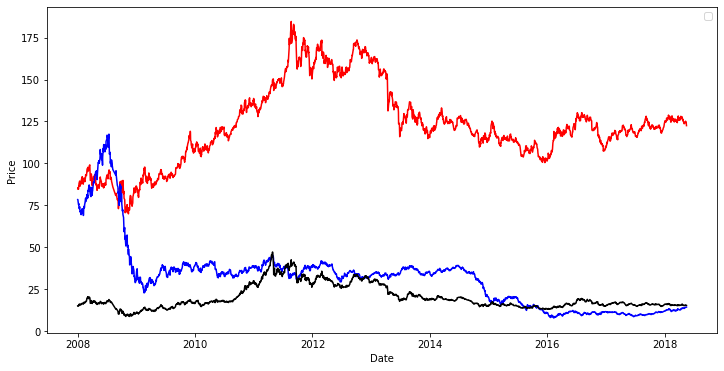

In [65]:
plt.figure(figsize=(12,6))
plt.plot(data_copy["Date"].values,data_copy["GLD"],color="red")
plt.plot(data_copy['Date'].values,data_copy["USO"],color='blue')
plt.plot(data_copy["Date"].values,data_copy["SLV"],color='black')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [67]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [68]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [69]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [71]:
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

1832 1832 458 458


In [72]:
regressor = RandomForestRegressor(n_estimators=100)

In [73]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [74]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [75]:
print(test_data_prediction)

[168.72279952  81.93519969 115.78890021 127.69290071 120.56290085
 154.87809796 150.49409935 126.00470051 117.40889858 126.07370046
 116.86140045 172.04220046 141.37849857 168.18139849 115.11060012
 117.45640035 138.75820297 170.24950109 159.3442024  157.45399994
 155.2271005  125.61220025 175.65320035 157.11480305 125.20140028
  93.82699996  77.63709992 120.6256002  119.15809978 167.36739959
  88.01880052 125.23350061  91.22710094 117.69950015 121.1851989
 135.95090095 115.46390113 115.44490071 147.50789931 107.33330085
 104.19750222  87.33089785 126.43470067 118.08949994 152.4613991
 119.74119959 108.34940013 107.98979831  93.34540065 127.19559739
  75.50540015 113.64299968 121.32830009 111.15329918 118.84459886
 120.44419945 158.89599996 168.41570113 146.84459653  85.80729871
  94.34060005  86.64639907  90.4182     118.92150082 126.41340092
 127.49409991 169.62630052 122.28159909 117.34569868  98.69639998
 167.84130144 143.2465987  132.22130303 121.23640228 120.58829925
 119.6429004

In [76]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889991960456149


In [77]:
Y_test = list(Y_test)

In [78]:
print(Y_test)

[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

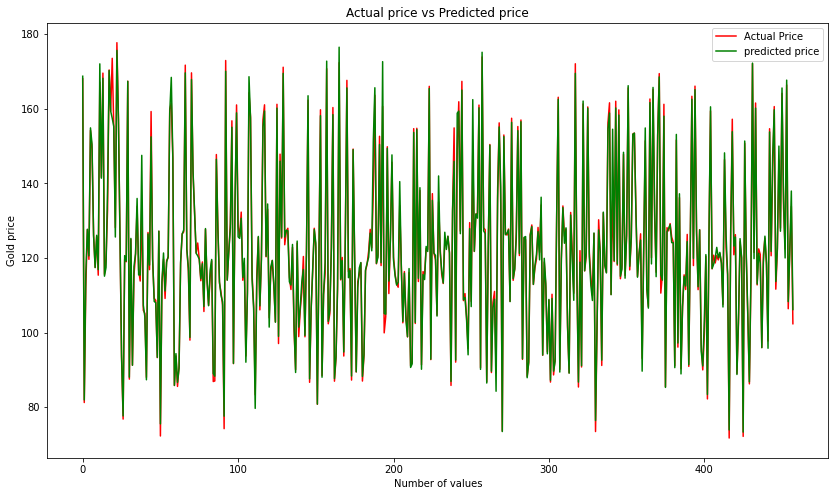

In [79]:
plt.figure(figsize=(14,8))
plt.plot(Y_test , color='red', label='Actual Price')
plt.plot(test_data_prediction , color='green', label='predicted price')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()


#predicted output

In [ ]:
output=regressor.predict([[1447.160034 , 78.470001 , 15.1800 ,1.471692]])

In [85]:
print("***********")
print("Gold price is:",+output)

print("***********")

***********
Gold price is: [85.02290026]
***********
